In [1]:
import pandas as pd 
import numpy as np

C:\Users\A\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\A\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\A\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
!pip install imbalanced-learn

In [3]:
!pip install scikit-learn

In [1]:
pip install nbconvert[webpdf]

Note: you may need to restart the kernel to use updated packages.


# Data Preparation 

### Import dataset in csv format 

In [4]:
attr = pd.read_csv(r"C:\Users\A\Desktop\employee_attr.csv")

Link to Kaggle dataset: https://www.kaggle.com/datasets/jpmiller/employee-attrition-for-healthcare

### Print the first five rows of dataset

In [5]:
attr.head(5)

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


### Count the number of categorical variables(dtype='object') and numerical variables(dtype=int64) 

In [6]:
print(attr.dtypes.value_counts())

int64     26
object     9
dtype: int64


### Group the features based on whether it is categorical or numerical

In [7]:
attr.columns.to_series().groupby(attr.dtypes).groups

{int64: ['EmployeeID', 'Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'Shift', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'], object: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']}

# Data Visualization

### Compare the number of employees who responded "yes" on Attrition and who responded "no" on Attrition 

In [8]:
import matplotlib.pyplot as plt 
import seaborn as sns

Text(0, 0.5, 'Attrition')

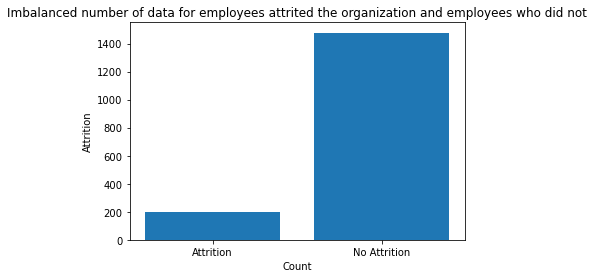

In [9]:
whetherAttrition = ['Attrition', 'No Attrition'] 
count = [len(attr[attr['Attrition'] == 'Yes']), len(attr[attr['Attrition'] == 'No'])]

plt.bar(whetherAttrition, count)
plt.title('Imbalanced number of data for employees attrited the organization and employees who did not')
plt.xlabel('Count')
plt.ylabel('Attrition')

Obviously, the employees who didn't attrite the company is much more frequently represented in dataset than the employees who attrited the company. 
Therefore, oversampling method such as SMOTE might be necessary to address this class imbalance problem. 

### Compare age distributions of employees based on their attrition status

Text(0.5, 0, 'Age')

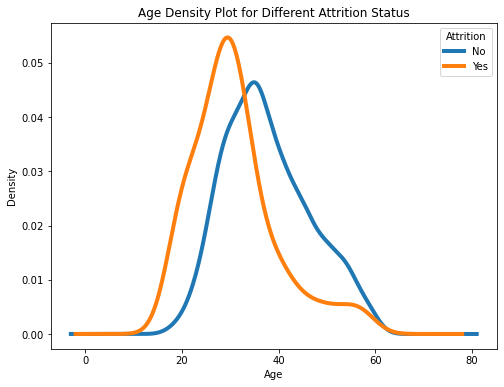

In [10]:
age_dist = attr.pivot(columns = 'Attrition',
                     values = 'Age')
age_dist.plot.kde(figsize = (8, 6),
                   linewidth = 4)
plt.title('Age Density Plot for Different Attrition Status')
plt.xlabel('Age')

Around ages of 20 to mid-30, employees are more likely to attrite, while in ages of 40 to 60, employees are less likely to attrite. 

### Compare the likelihood of attrition by Departments 

In [11]:
prop = [] 
for department in attr['Department'].unique(): 
    prop.append(len(attr[attr['Department'] == department][attr['Attrition'] == 'Yes']) / 
                len(attr[attr['Department'] == department]))
prop

C:\Users\A\AppData\Local\Temp\ipykernel_20088\2797141860.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  prop.append(len(attr[attr['Department'] == department][attr['Attrition'] == 'Yes']) /


[0.1393596986817326, 0.12311557788944724, 0.07736389684813753]

Text(0, 0.5, 'Departments')

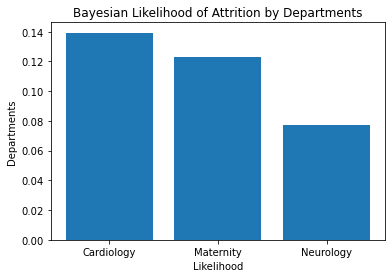

In [12]:
Departments = attr['Department'].unique()
plt.bar(Departments, prop)
plt.title('Bayesian Likelihood of Attrition by Departments')
plt.xlabel('Likelihood')
plt.ylabel('Departments')

Based on conditional probability inferences, the employees working for Cardiology are the most likely to attrite. 

### Monthly Income Distribution by attrition status 

Text(0.5, 0, 'Monthly Income')

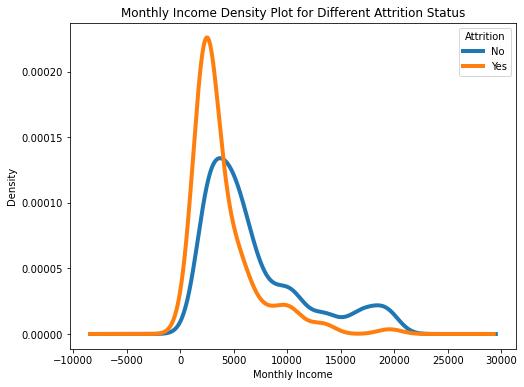

In [13]:
age_dist = attr.pivot(columns = 'Attrition',
                     values = 'MonthlyIncome')
age_dist.plot.kde(figsize = (8, 6),
                   linewidth = 4)
plt.title('Monthly Income Density Plot for Different Attrition Status')
plt.xlabel('Monthly Income')

Employees who earns less than 5000 USD is far more likely to attrite, while  employees who earns more than 5000 USD is more likely to 
stay at the company.

### Feature Correlation Heatmap

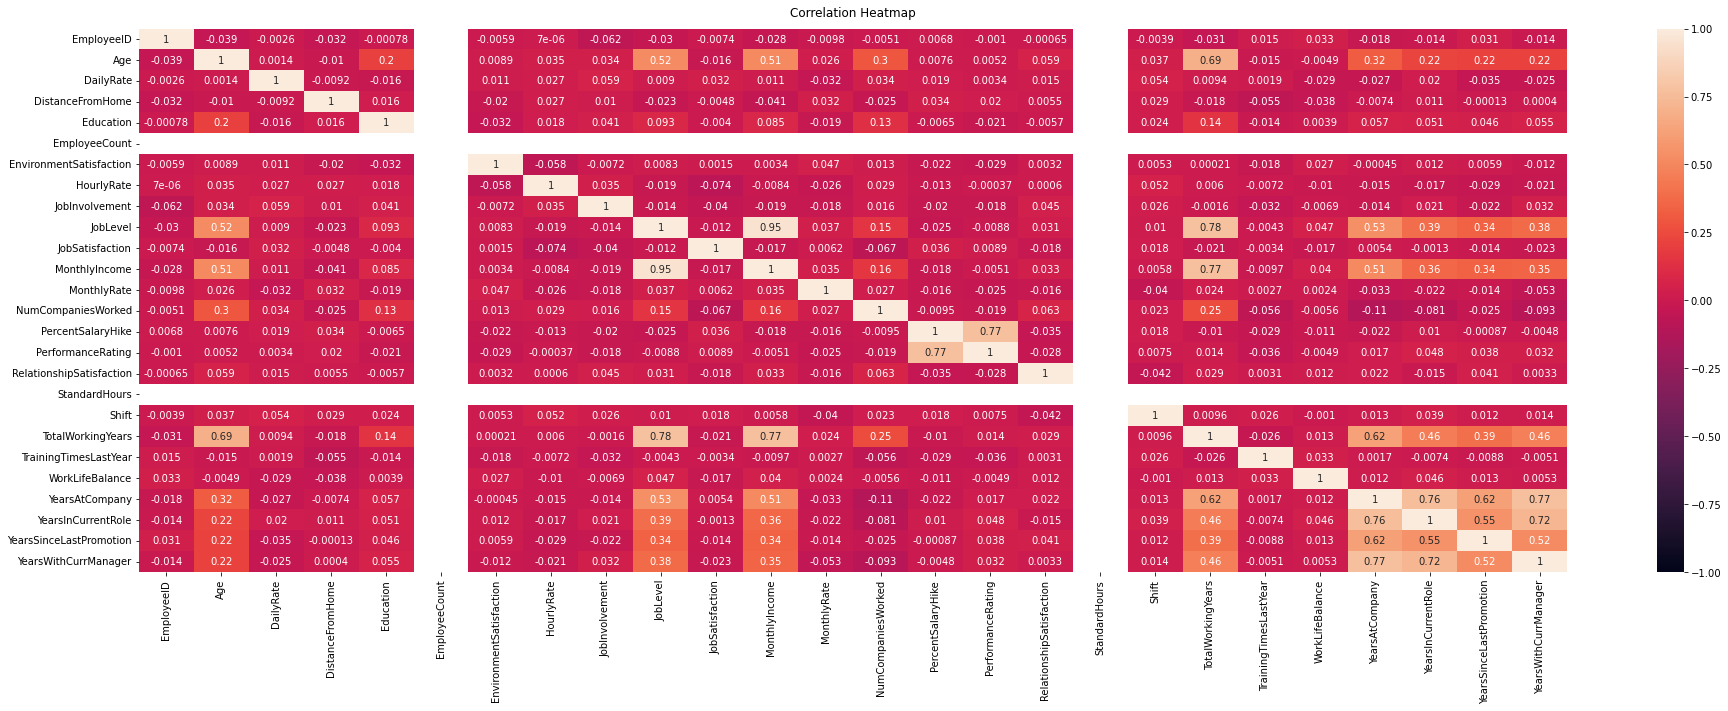

In [14]:
plt.figure(figsize=(32, 10))
heatmap = sns.heatmap(attr.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [15]:
#Since the correlation between monthly income ad job level is very high as 0.95, drop one of them.
attr = attr.drop("JobLevel", axis=1)

# Data Engineering

### Label Encode Categorical Variables 

In [16]:
cat_vars = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']
for cat_var in cat_vars: 
    attr[cat_var] = attr[cat_var].astype('category')
    attr[cat_var] = attr[cat_var].cat.codes 
attr[cat_vars]

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,0,2,0,1,0,2,2,0,1
1,0,1,1,1,1,3,1,0,0
2,1,2,1,4,1,2,2,0,1
3,0,1,1,1,0,3,1,0,1
4,0,2,1,3,1,2,1,0,0
...,...,...,...,...,...,...,...,...,...
1671,1,2,2,5,1,2,2,0,1
1672,0,2,0,2,0,2,1,0,1
1673,0,2,1,1,0,3,2,0,0
1674,0,2,2,1,0,4,1,0,0


### Scale Numerical Variables using Standard Scaler

In [17]:
from sklearn.preprocessing import StandardScaler

num_vars = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobSatisfaction', 
            'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 
            'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'Shift', 
            'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
attr[num_vars] = StandardScaler().fit_transform(attr[num_vars])

In [18]:
attr[num_vars]

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.452933,0.750837,-1.008126,-0.884927,0.0,-0.651470,1.412260,0.385287,1.142851,-0.110748,...,-1.594279,0.0,-0.942491,-0.426280,-2.178097,-2.515254,-0.169491,-0.073053,-0.681553,0.242949
1,1.329511,-1.299105,-0.149829,-1.860033,0.0,0.259935,-0.221278,-1.015454,-0.669276,-0.293315,...,1.189066,0.0,0.226728,-0.170938,0.151012,0.333101,0.486551,0.754220,-0.371823,0.804968
2,0.014644,1.425849,-0.885512,-0.884927,0.0,1.171341,1.313258,-1.015454,0.236787,-0.936423,...,-0.666497,0.0,-0.942491,-0.553950,0.151012,0.333101,-1.153553,-1.176083,-0.681553,-1.162098
3,-0.423644,1.473174,-0.762898,1.065286,0.0,1.171341,-0.468784,0.385287,0.236787,-0.763164,...,0.261285,0.0,-0.942491,-0.426280,0.151012,0.333101,0.158530,0.754220,0.247636,-1.162098
4,-1.081078,-0.521970,-0.885512,-1.860033,0.0,-1.562875,-1.260803,0.385287,-0.669276,-0.644909,...,1.189066,0.0,0.226728,-0.681621,0.151012,0.333101,-0.825533,-0.624568,-0.062094,-0.600079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,-1.190650,-0.820869,1.811993,0.090180,0.0,0.259935,0.026227,-2.416195,1.142851,-0.883535,...,-0.666497,0.0,-0.942491,-1.319974,0.151012,-2.515254,-0.989543,-1.176083,-0.681553,-1.162098
1672,1.000794,0.808126,0.095399,0.090180,0.0,0.259935,1.412260,-1.015454,1.142851,0.540398,...,0.261285,0.0,0.226728,0.467414,0.151012,0.333101,-0.661522,-0.624568,-0.371823,-0.600079
1673,-1.848083,0.394650,-1.008126,0.090180,0.0,1.171341,0.867747,-1.015454,-0.669276,-0.778607,...,1.189066,0.0,-0.942491,-1.319974,-2.178097,1.757279,-0.989543,-1.176083,-0.681553,-1.162098
1674,0.233789,-0.833323,-1.008126,-1.860033,0.0,1.171341,-0.023274,-1.015454,1.142851,1.316993,...,0.261285,0.0,0.226728,1.233438,0.151012,0.333101,2.290667,0.478462,2.725472,1.085977


Because there are 35 features in total, PCA, dimensionality reduction method, could be used to prevent the overfitting the classification 
model by reducing the number of features. 

### PCA

In [19]:
from sklearn.decomposition import PCA
attr_X = attr.drop(["Attrition", "EmployeeID"], axis=1)
pca = PCA(n_components=30)
p_c = pca.fit_transform(attr_X)
p_attri = pd.DataFrame(data = p_c)
print("Explained Variance Ratio: ", sum(pca.explained_variance_ratio_))

Explained Variance Ratio:  0.9999999999999998


Text(0.5, 0.85, 'cut-off threshold')

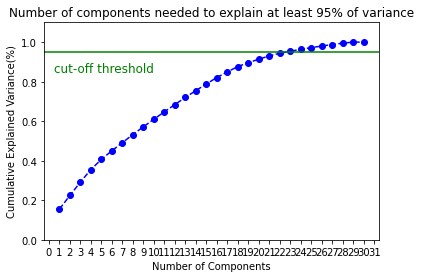

In [20]:
fix, axs = plt.subplots()
x = np.arange(1, 31, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0, 1.1) 
plt.plot(x, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 32, step=1))
plt.ylabel('Cumulative Explained Variance(%)')
plt.title('Number of components needed to explain at least 95% of variance') 

plt.axhline(y=0.95, color='g', linestyle='-')
plt.text(0.5, 0.85, 'cut-off threshold', color = 'green', fontsize=12)

95% of variance can be explained by 24 components, 11 less than the original number of components. 

In [21]:
pca = PCA(n_components=24)
p_c_final = pca.fit_transform(attr_X)
dataset = pd.DataFrame(data = p_c_final)
dataset

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,-0.347277,-2.168564,0.550450,0.036645,-0.693835,0.915648,1.779300,-0.122578,-1.680746,-1.550377,...,-1.121753,-0.379135,0.315681,2.003244,-0.885030,0.639294,-0.191583,0.083153,-0.120822,0.816234
1,0.763084,1.527927,2.943251,0.016039,-0.824654,-1.014640,-0.222221,0.168387,2.094838,-1.146386,...,-0.468547,-0.154376,0.421395,-0.738544,-1.076140,1.083025,0.990039,-0.494681,0.088996,-0.365882
2,-2.272660,0.352369,-1.528655,1.652065,-0.542191,-0.083843,-0.931325,-0.885824,-0.650541,-0.870423,...,-0.179121,0.507278,0.228738,1.010570,0.180471,0.358846,-0.036080,-0.665516,-0.106672,-0.171443
3,-0.554440,-1.073476,-0.165857,-1.304711,-0.513145,-0.641514,0.482613,-1.532449,0.380021,0.206446,...,0.108676,-1.534827,-0.023140,-0.481539,0.513383,0.245004,0.340520,0.303177,1.218794,0.667808
4,-1.631552,-0.525507,-1.273997,0.591570,-0.287787,0.015776,-0.795590,-0.656300,0.498302,-0.478411,...,0.992411,-0.237281,0.745892,2.291507,-0.066806,-0.516824,-0.434313,-0.477661,0.015500,-0.209082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,-2.957007,1.985775,-1.293350,0.577011,-1.516639,-0.790056,2.295570,2.441431,-1.718019,-1.288667,...,-0.753847,-0.303678,-0.128300,-0.341357,0.251563,-1.061745,-0.337906,-1.061574,0.067398,-0.319200
1672,-0.186638,-0.598778,0.604071,1.118557,0.317303,-0.472633,-0.339378,0.141720,-0.796287,-0.817751,...,-0.863837,0.193863,-0.663437,-0.427179,0.047156,0.926950,-0.442241,0.415510,-0.151982,0.154987
1673,-2.921367,-0.846443,0.167998,-1.187607,-1.284067,0.461647,-0.301127,-1.212650,1.622090,0.700880,...,-0.319509,-1.483950,-0.576985,-0.699302,0.178120,-0.490211,-0.651003,0.304985,-0.155416,0.593247
1674,3.315999,0.392869,0.434401,-1.990055,-0.296603,-1.757526,-0.596594,-1.058656,0.409339,-0.363268,...,-1.142116,0.858510,1.702285,-0.662610,1.410789,-0.120686,-0.766836,0.584512,-0.716917,0.180077


### SMOTE(Synthetic Minority Oversampling Technique)  

In [22]:
import sklearn 
from imblearn.over_sampling import SMOTE  
from collections import Counter
X = dataset
y = attr['Attrition']
sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X, y)
print('Original dataset shape %s' % Counter(y))
print('Resampled dataset shape %s' % Counter(y_sm))

Original dataset shape Counter({0: 1477, 1: 199})
Resampled dataset shape Counter({0: 1477, 1: 1477})


# Building Models

### Split Train and Test set

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

### Build Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=7, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, random_state=0)

### Evaluate Random Forest

In [25]:
print("Test Accuracy of random forest:", clf.score(X_test, y_test))

Test Accuracy of random forest: 0.9120135363790186


In [26]:
from sklearn.metrics import classification_report 
y_preds = clf.predict(X_test)
labels = ['No Attrition', 'Attrition']
print(classification_report(y_test, y_preds, target_names=labels))

              precision    recall  f1-score   support

No Attrition       0.95      0.88      0.91       313
   Attrition       0.88      0.94      0.91       278

    accuracy                           0.91       591
   macro avg       0.91      0.91      0.91       591
weighted avg       0.91      0.91      0.91       591



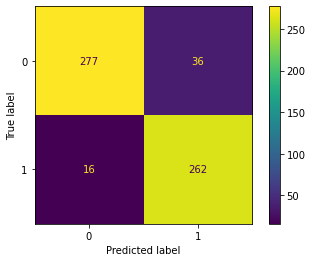

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_preds, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

### Build Logistic Regression 

In [28]:
from sklearn.linear_model import LogisticRegression 
lr = LogisticRegression(solver='liblinear') 
lr.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

### Evaluate Logistic Regression

In [33]:
print("Test Accuracy of logistic regression:", lr.score(X_test, y_test))

Test Accuracy of logistic regression: 0.8307952622673435


In [30]:
from sklearn.metrics import classification_report 
y_preds_lr = lr.predict(X_test)
labels = ['No Attrition', 'Attrition']
print(classification_report(y_test, y_preds_lr, target_names=labels))

              precision    recall  f1-score   support

No Attrition       0.86      0.81      0.84       313
   Attrition       0.80      0.85      0.83       278

    accuracy                           0.83       591
   macro avg       0.83      0.83      0.83       591
weighted avg       0.83      0.83      0.83       591



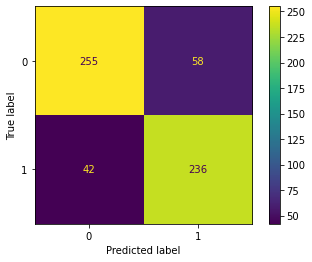

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_preds_lr, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

### Build Support Vector Classifier

In [32]:
from sklearn.svm import SVC
svc = SVC(kernel='poly')
svc.fit(X_train, y_train)

SVC(kernel='poly')

### Evluate Support Vector Classifier

In [34]:
print("Test Accuracy of support vector classifier:", svc.score(X_test, y_test))

Test Accuracy of support vector classifier: 0.9306260575296108


In [37]:
from sklearn.metrics import classification_report 
y_preds_svc = svc.predict(X_test)
labels = ['No Attrition', 'Attrition']
print(classification_report(y_test, y_preds_svc, target_names=labels))

              precision    recall  f1-score   support

No Attrition       0.98      0.89      0.93       313
   Attrition       0.89      0.97      0.93       278

    accuracy                           0.93       591
   macro avg       0.93      0.93      0.93       591
weighted avg       0.93      0.93      0.93       591



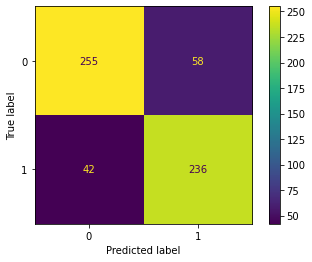

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_preds_svc, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()